# 조건부 독립

확률변수 $A, B$가 있다고 가정할 때 두 확률변수가 독립이라면 $A, B$의 결합확률은 주변확률의 곱과 같다.

$$P(A,B) = P(A)P(B)$$

조건부독립(conditional independence)은 위의 일반적인 독립에서 새로운 확률변수 $C$가 조건이 되는 경우이다.

이 경우 $C$를 알고있다는 가정 하에 $A, B$는 독립이다.

$$P(A, B|C) = P(A|C)P(B|C) = A \text{⫫} B \;\vert\; C$$

이 경우 $A, B$가 $C$에 대한 조건부독립이면 아래의 관계가 성립한다.

$$P(A|B,C) = P(A|C)$$


$$P(B|A,C) = P(B|C)$$

위의 관계를 직관적으로 이해하기 위해 부모의 키에 따른 형제의 키에 대한 관계를 확인해보자.

In [33]:
np.random.seed(0)
C = np.random.normal(170, 15, 2000)
A = C + np.random.normal(0, 5, 2000)
B = C + np.random.normal(0, 5, 2000)

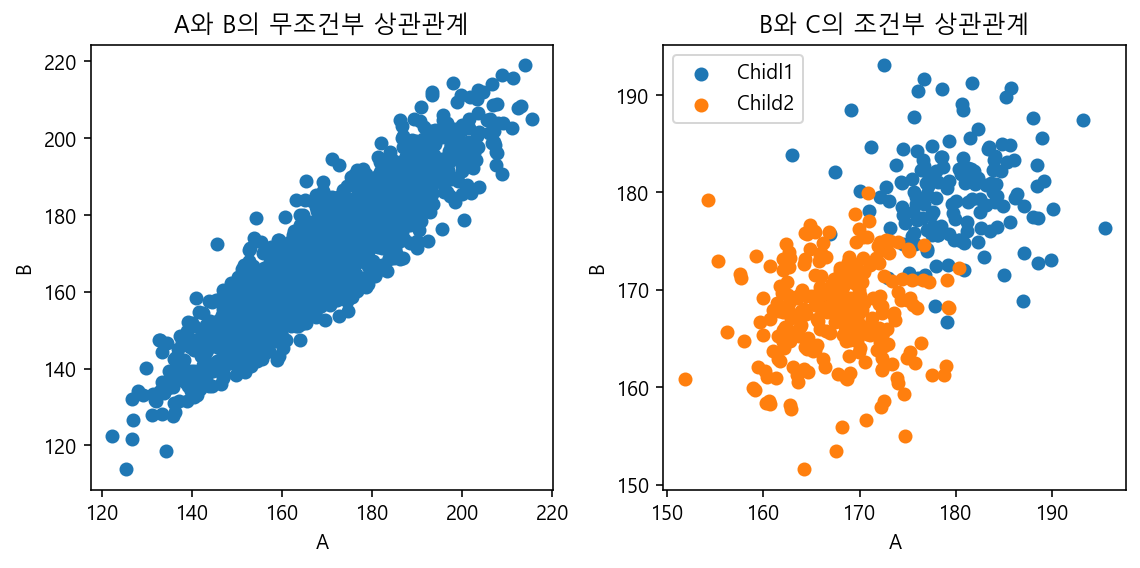

In [42]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(A, B)
plt.xlabel("A")
plt.ylabel("B")
plt.title("A와 B의 무조건부 상관관계")

plt.subplot(122)
idx1 = (178 < C) & (C < 182)
idx2 = (165 < C) & (C < 170)
plt.scatter(A[idx1], B[idx1], label="Chidl1")
plt.scatter(A[idx2], B[idx2], label="Child2")
plt.xlabel("A")
plt.ylabel("B")
plt.legend()
plt.title("B와 C의 조건부 상관관계")

plt.tight_layout()
plt.show()

위의 산점도를 통해 $B, C$는 상관관계가 있다. 즉, 부모와 자식간의 키는 상관관계가 확실하게 존재한다. 


하지만 부모의 키가 고정되어있다면 두 형제의 키는 서로 독립인 모습을 확인할 수 있다.

# 나이브가정

텍스트 데이터 분석에서 BOW방식을 이용하면 피처의 갯수가 구문, 구절의 갯수가 되기 때문에 수만, 수십만개가 될 수 있다. 이 경우 일반적인 분류모형을 이용하는 것은 어렵기 때문에 나이브 가정을 이용한 나이브베이즈 분류모형을 이용할 수 있다.

나이브가정이란(Naive assumption) 모든 차원의 독립변수가 서로 조건부독립이라 가정하여 벡터 $x$의 결합확률분포는 개별 스칼라 원소의 확률분포 함수의 곱이 된다.

$$P(x_1, \ldots, x_D \mid y = k) = \prod_{d=1}^D P(x_d \mid y = k)$$

이를 통해 가능도함수를 추정하는 것으로 베이즈 정리를 통한 조건부확률을 계산한다.

$$\begin{split}
\begin{align}
P(y = k \mid x) 
&= \dfrac{ P(x_1, \ldots, x_D \mid y = k) P(y = k) }{P(x)} \\
&= \dfrac{ \left( \prod_{d=1}^D P(x_{d} \mid y = k) \right) P(y = k) }{P(x)}
\end{align}
\end{split}$$

# sklearn을 이용한 NB모델

사이킷런에서는 3가지 나이브베이즈 모델 클래스를 제공한다.

- GaussianNB : 정규분포 나이브베이즈
- BernoulliNB : 베르누이분포 나이브베이즈
- MultinomialNB : 다항분포 나이브베이즈


NB모델의 사전확률(Prior)과 관련된 속성

- classes_ : 종속변수 클래스
- class_count_ : 종속변수 클래스 별 샘플사이즈
- class_prior_ : 종속변수 $Y$의 무조건부 확률분포 $P(y)$ *정규분포만
- class_log_prior_ : 종속변수 $Y$의 무조건부 확률분포에 로그를 취한 값 *베르누이, 다항분포만

## GaussianNB

가우시안 나이브베이즈 모델의 속성

- theta_ : 정규분포의 기댓값 $\mu$
- sigma_ : 정규분포의 분산 $\sigma^2$

다음과 같이 클래스 ($y=0, 1$)에 따라 모수값이 달라지는 정규분포를 따르는 두 독립변수 $x_1, x_2$가 있다고 가정하자.

$$\begin{split} 
\mu_0 = \begin{bmatrix} -2 \\ -2 \end{bmatrix},
\;\; 
\Sigma_0 = \begin{bmatrix} 1 & 0.9 \\ 0.9 & 2 \end{bmatrix} 
\end{split}$$

$$\begin{split} 
\mu_1 = \begin{bmatrix} 2 \\ 2 \end{bmatrix},
\;\; 
\Sigma_1 = \begin{bmatrix} 1.2 & -0.8 \\ -0.8 & 2 \end{bmatrix} 
\end{split}$$

$y=0$인 경우의 샘플을 40개, $y=1$인 경우의 샘플을 60개를 샘플링하여 시각화 한 결과는 다음과 같다.

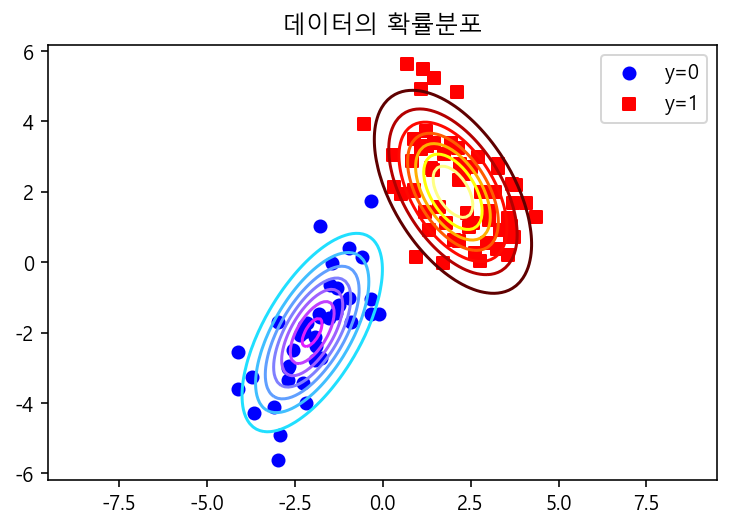

In [48]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")
plt.legend()
plt.title("데이터의 확률분포")
plt.axis("equal")
plt.show()

위 데이터를 GaussianNB모형으로 추정하면 확률분포는 다음과 같다.

In [60]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

def get_gaussianNB_info(model_norm):
    print('y 클래스 : ',model_norm.classes_)
    print('클래스별 샘플사이즈 :',model_norm.class_count_)
    print('클래스별 사전확률 :',model_norm.class_prior_)
    print('x1의 모수 :', model_norm.theta_[0], model_norm.sigma_[0])
    print('x2의 모수 :', model_norm.theta_[1], model_norm.sigma_[1])
    
get_gaussianNB_info(model_norm)

y 클래스 :  [0. 1.]
클래스별 샘플사이즈 : [40. 60.]
클래스별 사전확률 : [0.4 0.6]
x1의 모수 : [-1.96197643 -2.00597903] [1.02398854 2.31390497]
x2의 모수 : [2.19130701 2.12626716] [1.25429371 1.93742544]


이를 통해 데이터의 확률분포를 시각화 한 결과는 다음과 같다.

GaussianNB 모델은 조건부 독립을 이용하므로 각 클래스별 확률분포가 X축과 Y축에 수직인 타원 모양을 그리게 된다.

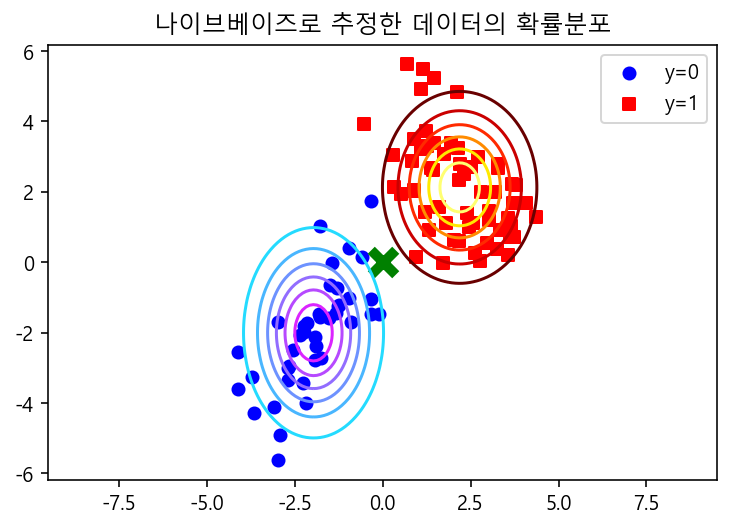

In [61]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")

# 새로운 데이터
x_new = [0, 0]
plt.scatter(x_new[0], x_new[1], c="g", marker="x", s=150, linewidth=5)
plt.legend()
plt.title("나이브베이즈로 추정한 데이터의 확률분포")
plt.axis("equal")
plt.show()

이를 이용해 새로운 값을 예측하는 방법은 다음과 같다.

In [62]:
model_norm.predict_proba([x_new])

array([[0.48475244, 0.51524756]])

위 결과를 통해 새로운 데이터는 $P(y=0)=0.48, P(y=1)=0.51$인 것을 확인할 수 있고 이는 $y=1$로 분류된다.

## BernoulliNB

베르누이분포 나이브베이즈 모델은 독립변수가 0또는 1의 값을 가진 경우 이용할 수 있는 NB 분류모델이다.

BeronoulliNB 클래스 속성

- feature_count_ : 각 클래스 $k$에 대해 $d$번째 동전이 앞면이 나온 횟수 $N_{d,k}$

- feature_log_proba_ : 베르누이분포 모수의 로그

### 스무딩(smoothing)

베르누이 분포의 대표적인 예시는 동전을 던졌을 때 앞면이냐 혹은 뒷면이냐에 대한 문제이다.

여기서 동전 10번을 던졌을 때 모두 앞면이 나오거나 모두 뒷면이 나오는 경우의 모수값은 0 또는 1이 된다.


이러한 경우는 데이터의 갯수가 적을 때 발생할 수 있는데 이처럼 데이터의 갯수가 적은 경우에 베르누이분포 나이브베이즈 모델을 이용하는 경우 스무딩 방식을 이용해 모수값을 일반화시킬 수 있다.

$$\hat{\mu}_{d,k} = \frac{ N_{d,k} + \alpha}{N_k + 2 \alpha}$$

아래의 예시는 각 문서에서 특정 키워드 포함여부를 나타내는 BOW 행렬이다. 클래스가 스팸, 햄 메일로 분류되는 경우 베르누이 나이브베이즈 분류모델을 이용할 수 있다.

In [66]:
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])

y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [67]:
from sklearn.naive_bayes import BernoulliNB

model_bern = BernoulliNB().fit(X, y)

model_bern.classes_, model_bern.class_count_

(array([0, 1]), array([4., 6.]))

In [68]:
np.exp(model_bern.class_log_prior_)

array([0.4, 0.6])

In [69]:
# 각 클래스에 따라 각 키워드가 등장한 횟수
fc = model_bern.feature_count_
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

In [72]:
# 실제 베르누이 모수값
fc/4

array([[0.5 , 1.  , 0.75, 0.25],
       [0.5 , 0.75, 1.25, 0.75]])

그런데 모델의 베르누이 모수값을 확인해보면 위의 모수값과 살짝 다른것을 확인할 수 있다. 이는 모델에서 내부적으로 alpha값이 1로 스무딩이 적용되었기 때문이다.

In [71]:
# log_proba이기에 지수함수를 취함

theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

In [73]:
# 스무딩 alpha값

model_bern.alpha

1.0

이렇게 학습된 모델을 통해 새로운 2, 3, 4번 키워드를 포함하는 문서가 분류될 pred_proba는 다음과 같다.

In [74]:
x_new = np.array([0, 1, 1, 1])
model_bern.predict_proba([x_new])

array([[0.34501348, 0.65498652]])

## MultinomialNB

다항분포 나이브베이즈 모형의 속성

- feature_count_ : 각 클래스 $k$에서 $d$번째가 나온 횟수 $N_{d,k}$
- feature_log_proba_ : 다항분포의 모수의 로그

다항분포 NB에서는 스무딩 공식이 다음과 같이 변한다.

$$\hat{\mu}_{d,k} = \frac{ N_{d,k} + \alpha}{N_k + D \alpha}$$

베르누이 NB모델과 마찬가지로 스팸, 햄 메일 분류 문제를 예로 들 수 있다. 다만 차이점은 다항분포이기에 각 키워드의 출현 빈도를 이용할 수 있다는 점이다.

In [76]:
X = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [77]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

In [78]:
print(model_mult.classes_)
print(model_mult.class_count_)
print(model_mult.class_log_prior_)

[0 1]
[4. 6.]
[-0.91629073 -0.51082562]


In [81]:
fc = model_mult.feature_count_
fc

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

In [80]:
# 실제 모수

fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[0.3       , 0.4       , 0.075     , 0.225     ],
       [0.10416667, 0.14583333, 0.375     , 0.375     ]])

In [82]:
# 모수 추정치

theta = np.exp(model_mult.feature_log_prob_)
theta

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [84]:
# 새로운 문서를 분류

x_new = np.array([10, 10, 10, 10])
model_mult.predict_proba([x_new])

array([[0.38848858, 0.61151142]])

이 글은 '데이터 사이언스 스쿨'을 공부하며 작성했습니다.